# Table of Contents

1. [Data Loading](#dload)
2. [Model Building](#mbuild)
3. [Pretrained Model Weights Loading](#mload)
4. [Model Predictions](#mpredict)
5. [Performance Visualization](#pvis)
6. [Performance Measures](#pmeasures)
7. [Qualitative Results](#quality)

In [1]:
#Imports the print function from newer versions of python
from __future__ import print_function

%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/zeeshanalipnhwr/Semantic-Segmentation-Keras
!mv Semantic-Segmentation-Keras Semantic_Segmentation_Keras

Cloning into 'Semantic-Segmentation-Keras'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 783 (delta 67), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (783/783), 73.57 MiB | 23.99 MiB/s, done.
Resolving deltas: 100% (393/393), done.


# Data Loading and Spliting<a id='dload'><\a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip "/content/drive/My Drive/MonuSeg-dataset"

Archive:  /content/drive/My Drive/MonuSeg-dataset.zip
  inflating: MonuSeg/Test/GroundTruth/TCGA-AC-A2FO-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-IZ-8196-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-ZF-A9R5-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-A6-6782-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-2Z-A9J9-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-HT-8564-01Z-00-DX1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-44-2665-01B-06-BS6_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-EJ-A46H-01A-03-TSC_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-69-7764-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-GL-6846-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-CU-A0YN-01A-02-BSB_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-FG-A4MU-01B-01-TS1_bin_mask.png  
  inflating: MonuSeg/T

In [0]:
files_path = "./MonuSeg"

X_test:  (14, 1000, 1000, 3) 
Y_test:  (14, 1000, 1000, 1)


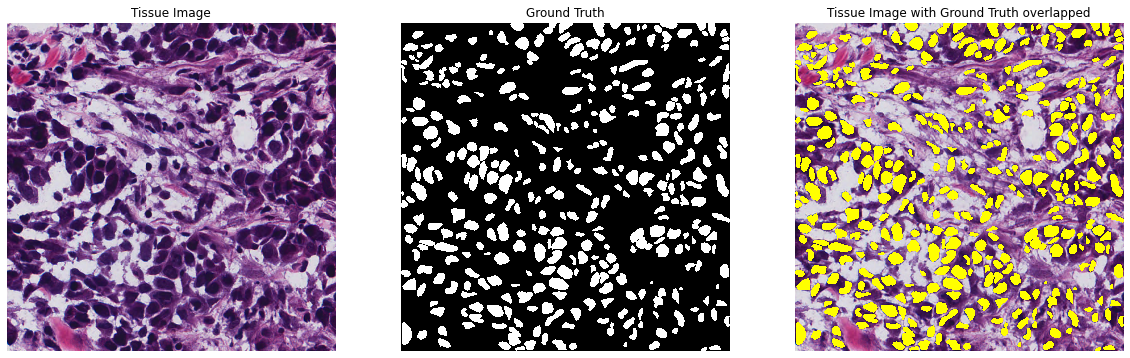

In [8]:
from Semantic_Segmentation_Keras.Utils import display, load_data2

(X_test, Y_test) = load_data2.load_testing_data_as_it_is(files_path, load_as="rgb")

print ("X_test: ", X_test.shape, "\nY_test: ", Y_test.shape)

display.display_masked(image=X_test[0], mask=Y_test[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")

Pad zeroes to the test data to reshape them as 1024x1024 from 1000x1000.

In [10]:
import numpy as np

X_test_padded = np.zeros((X_test.shape[0], 1024, 1024, 3))
Y_test_padded = np.zeros((Y_test.shape[0], 1024, 1024, 1))
X_test_padded[:, 12:12+1000, 12:12+1000, :] = X_test
Y_test_padded[:, 12:12+1000, 12:12+1000, :] = Y_test
X_test = X_test_padded
Y_test = Y_test_padded
print ("X_test: ", X_test.shape, "\nY_test: ", Y_test.shape)

X_test:  (14, 1024, 1024, 3) 
Y_test:  (14, 1024, 1024, 1)


# Model Building<a id='mbuild'><\a>

In [11]:
# import all the models and their respective configuration files
from Semantic_Segmentation_Keras.Models import SegNet, UNet, DeepLabV3
from Semantic_Segmentation_Keras.Configs import SegNet_Configs, UNet_Configs, DeepLabV3_Configs

# create a model of your choice among the above availabe models
model = SegNet.SegNet(depth=SegNet_Configs.DEPTH).SegNet(input_shape=(None,None, 3))
#model = UNet.SegNet(depth=UNet_Configs.DEPTH).UNet(input_shape=(None, None, 3))
#model = DeepLabV3.DeepLabV3(depth=DeepLabV3_Configs.DEPTH).DeepLabV3(input_shape=(None, None, 3))

# optionally view the created model summary
model.summary()

Using TensorFlow backend.














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 6 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 6 36928       batch_normalization_1[0][0]      
________________________________________________________________________________

# Pretrained Model Weights Loading<a id='mload'><\a>

In [0]:
model.load_weights("drive/My Drive/segnet_basic.model")

# Model Predictions

In [0]:
# make predictions on the network
predictions = model.predict(X_test, batch_size=1)

In [0]:
# remove the padded zeros from X_test and Y_test
X_test = X_test[:, 12:12+1000, 12:12+1000, :]
Y_test = Y_test[:, 12:12+1000, 12:12+1000, :]

In [0]:
# discard the predictions for the padded portion of X_train
predictions = predictions[:, 12:12+1000, 12:12+1000, :]

In [16]:
Y_test.shape, predictions.shape

((14, 1000, 1000, 1), (14, 1000, 1000, 1))

# Performance Measures<a id='pmeasures'><\a>

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
TN, FP, FN, TP = confusion_matrix(Y_test.flatten().astype(int),
                             predictions.round(0).flatten().astype(int)).ravel()

In [19]:
TN, FP, FN, TP

(10881354, 353430, 908643, 1856573)

## Accuracy
It is defined as $accuracy = \frac{TP+TN}{TP+FP+TN+FN}$.

In [20]:
print ("Accuracy:", round((TP+TN)/(TP+FP+TN+FN)*100, 2))

Accuracy: 90.99


## F1 Score (Dice Score)

It is defined as the harmonic mean of precision and recall as $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$ where $precision=\frac{TP}{TP+FP}$ and $recall=\frac{TP}{TP+FN}$. This simplifies to and hence is equal to the dice score coefficient which is defined as $DSC = \frac{2\times{TP}}{2\times{TP}+FP+FN}$.

In [21]:
precision, recall = TP/(TP+FP), TP/(TP+FN)
print ("F1 Score:", round(2.0/(1.0/precision+1.0/recall), 4))

F1 Score: 0.7463


## Classification Report

In [22]:
print (classification_report(Y_test.round(0).flatten().astype(int), predictions.round(0).flatten().astype(int)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95  11234784
           1       0.84      0.67      0.75   2765216

    accuracy                           0.91  14000000
   macro avg       0.88      0.82      0.85  14000000
weighted avg       0.91      0.91      0.91  14000000



## Confusion Matrix

In [23]:
Confusion_Matrix = ([[TN, FP], [FN, TP]])
Confusion_Matrix

[[10881354, 353430], [908643, 1856573]]

# Qualitative Results

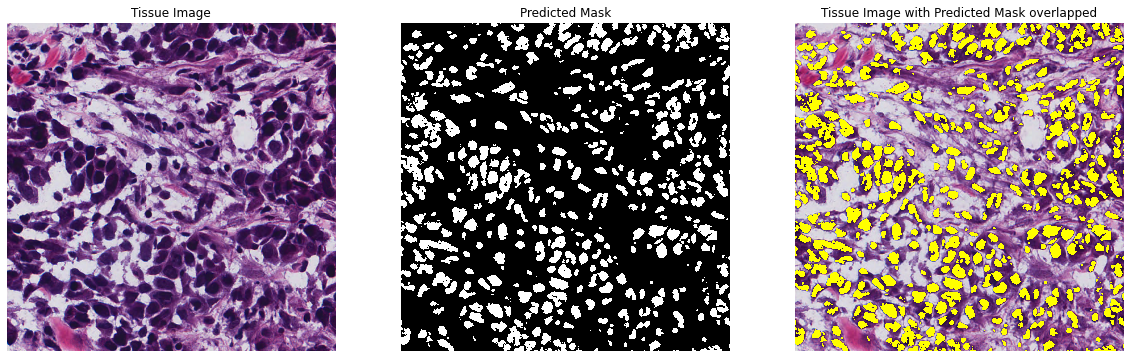

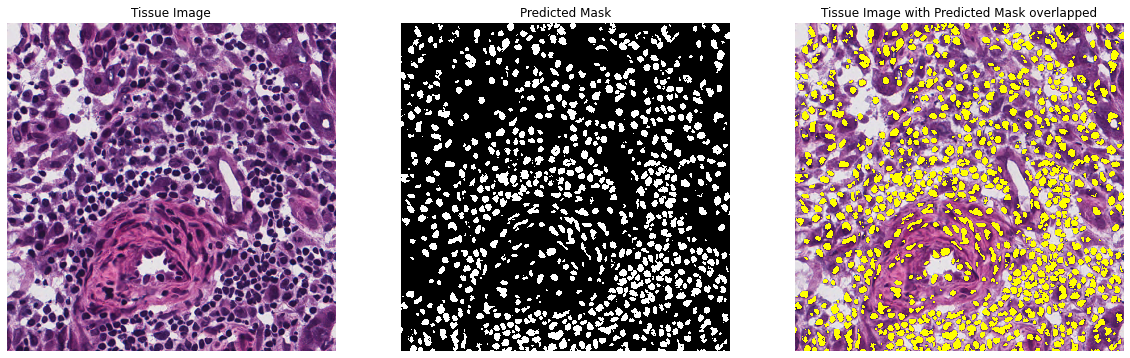

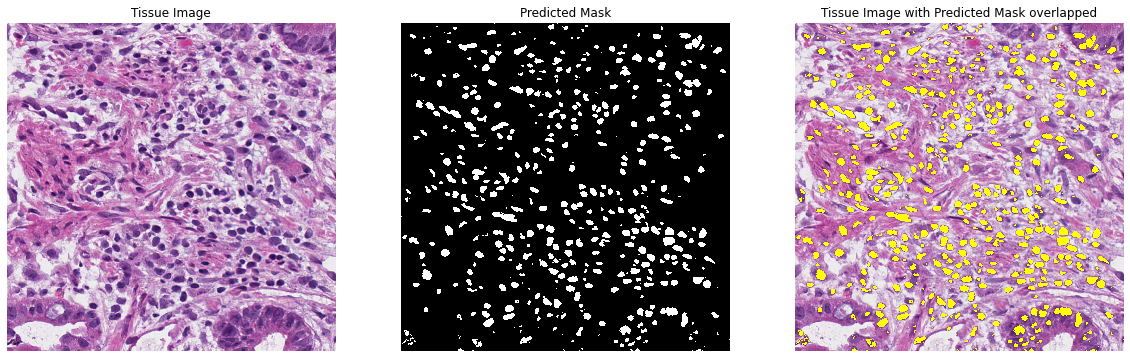

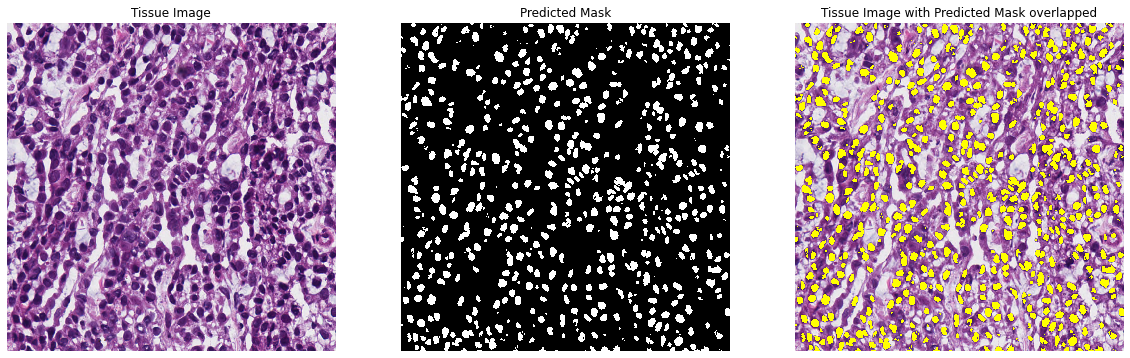

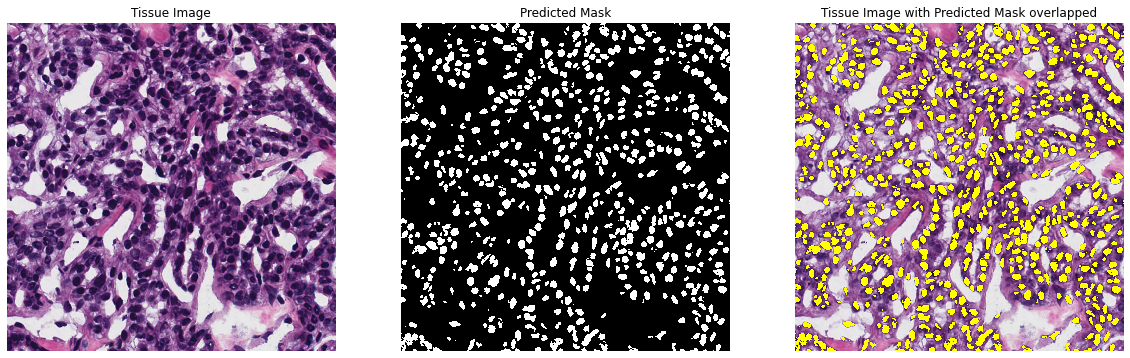

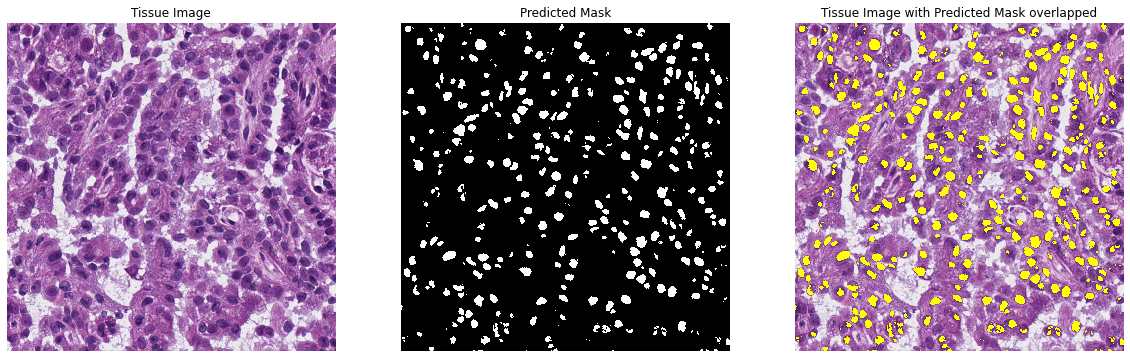

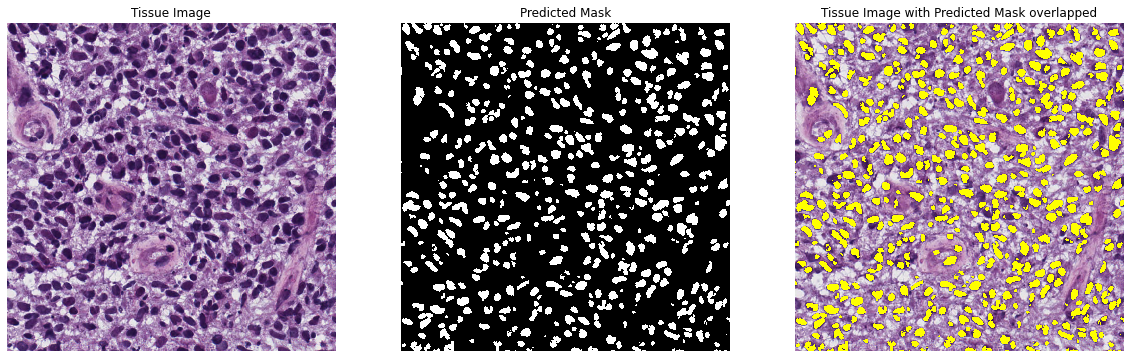

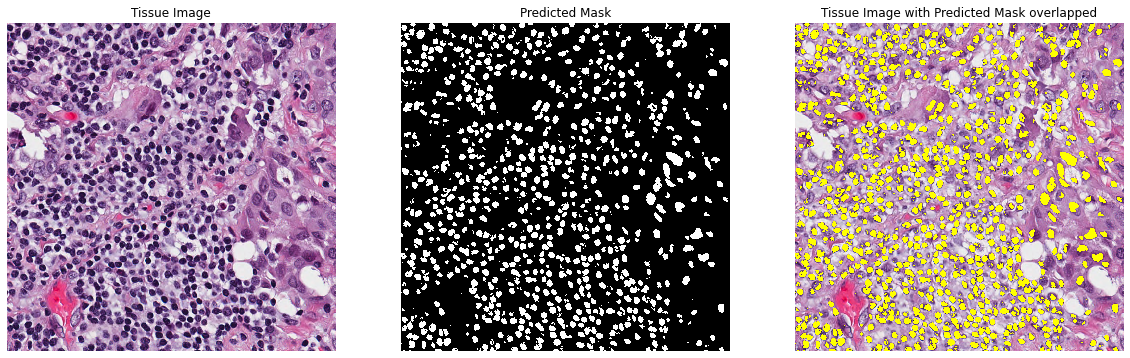

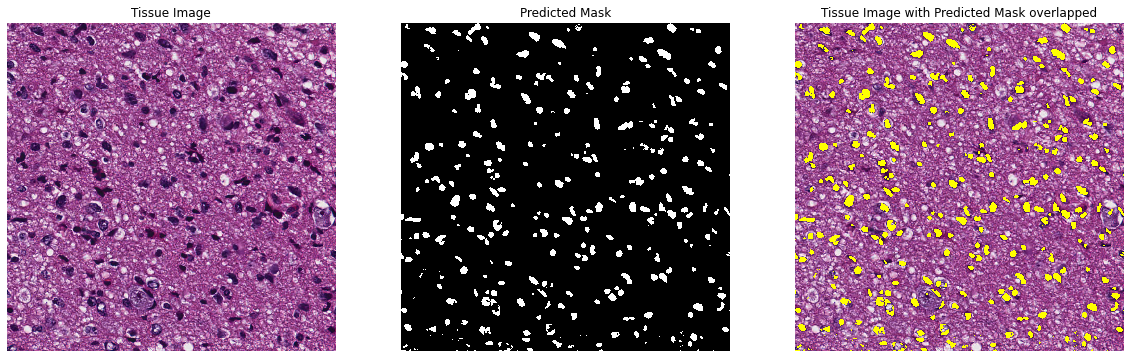

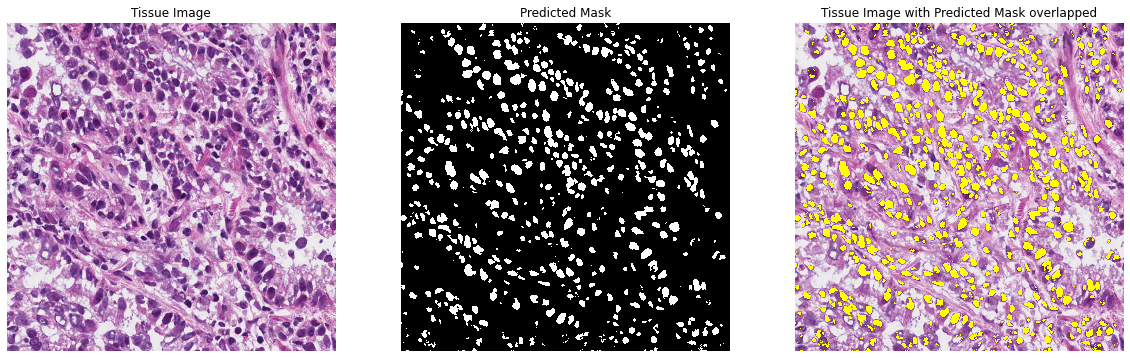

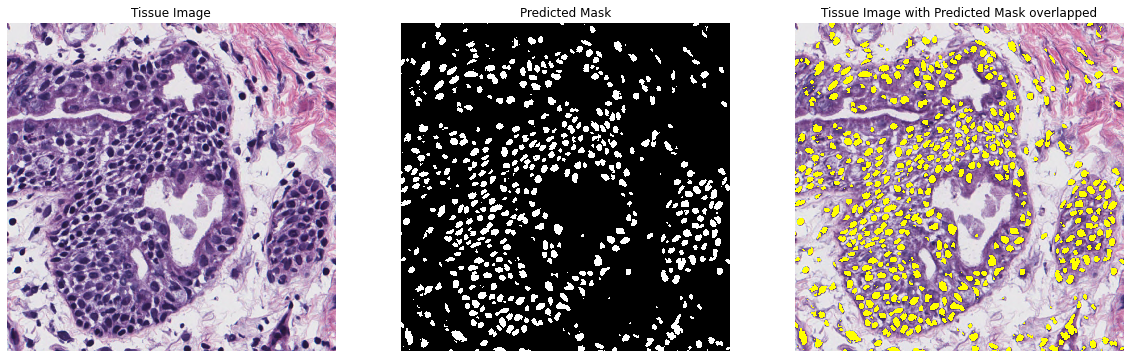

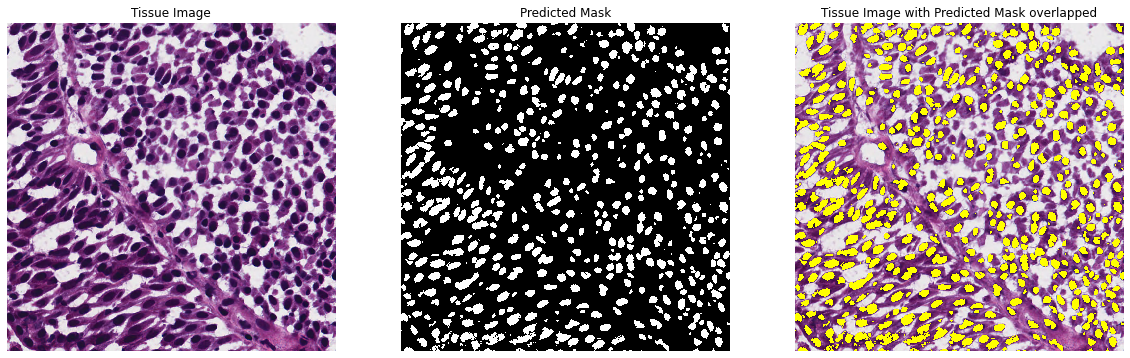

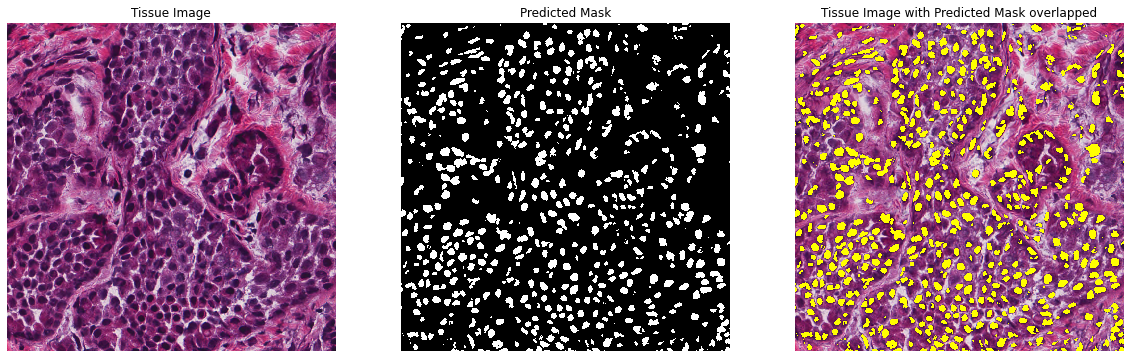

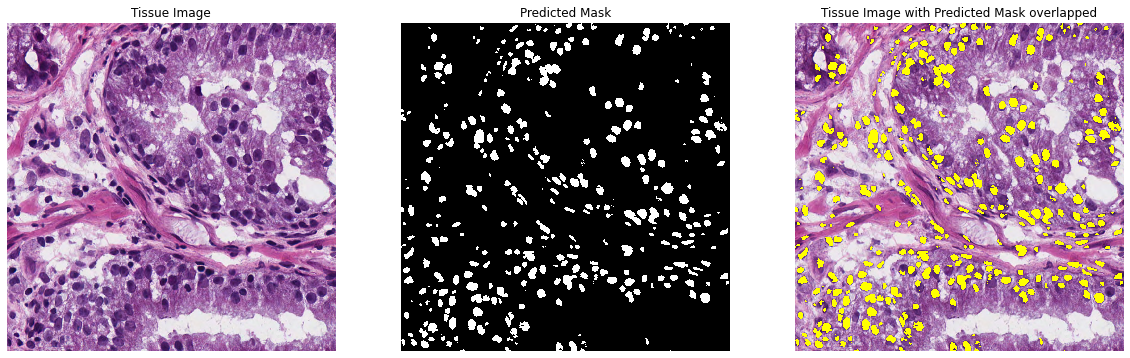

In [24]:
for idx in range(X_test.shape[0]):
    display.display_masked(X_test[idx], predictions[idx].round(0), "Tissue Image", "Predicted Mask")